In [219]:
# Importing necessary libraries

import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [269]:
df=pd.read_csv('Dataset.csv')
df

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,WH_124995,EID_74995,Rural,Small,North,Zone 1,3,0,4,5390,...,1,142,34.0,2005.0,22,1,A,2,30,32093
24996,WH_124996,EID_74996,Rural,Mid,West,Zone 2,6,0,4,4490,...,1,130,28.0,2012.0,10,0,B,4,18,12114
24997,WH_124997,EID_74997,Urban,Large,South,Zone 5,7,0,2,5403,...,1,147,NaN,NaN,23,0,B+,5,25,27080
24998,WH_124998,EID_74998,Rural,Small,North,Zone 1,1,0,2,10562,...,1,60,25.0,NaN,18,0,A,6,30,25093


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

### 1. Dataset is having 25000 rows with 24 cols
### 2.It contains 8 categorical and 16 numeric columns
### 3. There are null values in columns  workers_num,wh_est_year and approved_wh_govt_certificate

In [271]:
### Check the unique values
for col in df.columns:
    print(col,':',df[col].unique())

Ware_house_ID : ['WH_100000' 'WH_100001' 'WH_100002' ... 'WH_124997' 'WH_124998'
 'WH_124999']
WH_Manager_ID : ['EID_50000' 'EID_50001' 'EID_50002' ... 'EID_74997' 'EID_74998'
 'EID_74999']
Location_type : ['Urban' 'Rural']
WH_capacity_size : ['Small' 'Large' 'Mid']
zone : ['West' 'North' 'South' 'East']
WH_regional_zone : ['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4']
num_refill_req_l3m : [3 0 1 7 8 4 6 5 2]
transport_issue_l1y : [1 0 4 3 2 5]
Competitor_in_mkt : [ 2  4  3  5  1  8  7  6 10  9 12  0]
retail_shop_num : [ 4651  6217  4306 ...  7768  7931 10562]
wh_owner_type : ['Rented' 'Company Owned']
distributor_num : [24 47 64 50 42 37 38 45 35 31 40 48 26 68 16 28 58 19 49 69 32 25 46 62
 67 21 51 57 59 23 17 56 22 63 30 53 66 36 29 44 55 39 54 33 27 18 65 34
 52 43 70 60 61 41 15 20]
flood_impacted : [0 1]
flood_proof : [1 0]
electric_supply : [1 0]
dist_from_hub : [ 91 210 161 103 112 152  77 241 124  78 150 225  95 242 129 190 231 261
 159 189  65 156 199  80 140  67 22


* Ware_house_ID: It is having 25000 different IDS
* WH_Manager_ID: It is also having 25000 different IDS
* Location_type: It  shows whether location is urban or rural 
* WH_capacity_size: It has three different sizes 'Small' ,'Large' and 'Mid'
* zone: It consists of four zones 'West' 'North' 'South' and 'East'
* WH_regional_zone: Regional zone of the warehouse consists of 6 zones
* num_refill_req_l3m: It contains values from 0 to 8
* transport_issue_l1y: transport issues registered having values from 0 to 5
* Competitor_in_mkt: no of instant noodles competitors ranging from 0 to 10 and 12
* retail_shop_num: contains the shop number of retail shops 
* wh_owner_type: Tells whether Company is owning the warehouse or they got on rent
* distributor_num: no of distributer works in between warehouse and retail shops
* flood_impacted: Tells  whether warehouse is in the Flood impacted area or not
* flood_proof:Tells whether warehouse is a flood-proof or not 
* electric_supply:Tells whether warehouse have electric back up or not
* dist_from_hub: Tells the distance between warehouse to the production hub in Kms
* workers_num: no of workers in the warehouse
* wh_est_year: Warehouse established year
* storage_issue_reported_l3m:Tells the issues reported in Warehouse 
* temp_reg_mach: Tells whether Warehouse have temperature regulating machine indicator
* approved_wh_govt_certificate: Tells what kind of standard certificate has been issued to the warehouse from government 
* wh_breakdown_l3m: Tells no of times warehouse face  breakdown ,which is ranging from 0 to 6
* govt_check_l3m: Tells no of time government Officers have been visited the warehouse 
* product_wg_ton: Tells the product weight  in tons





### Checking No of null values

In [272]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

* There are null vales present in workers_num ,wh_est_year,approved_wh_govt_certificate


<AxesSubplot:>

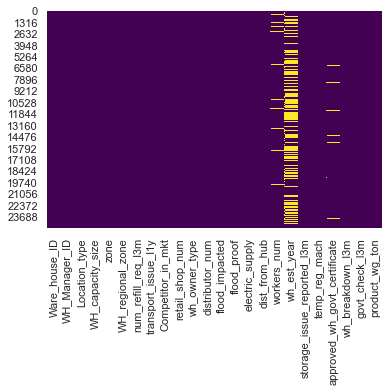

In [273]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')


<AxesSubplot:xlabel='wh_est_year', ylabel='Count'>

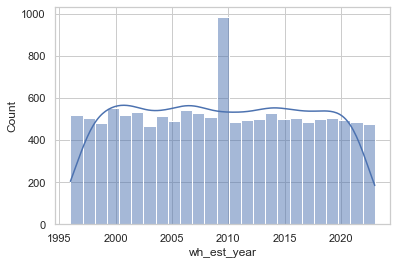

In [274]:
sns.histplot(df['wh_est_year'],kde=True)

* The distribution is very slight right-skewness so filling null values with median

In [275]:
df['wh_est_year'] = df['wh_est_year'].fillna(df['wh_est_year'].median())

<AxesSubplot:xlabel='workers_num', ylabel='Count'>

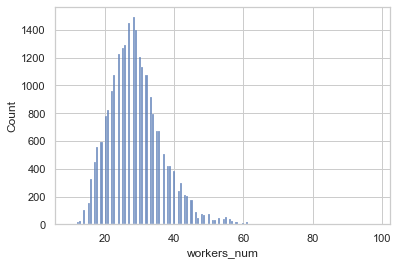

In [276]:
sns.histplot(df['workers_num'])

* The distribution is right skewed so filling it with median

In [277]:
df['workers_num'] = df['workers_num'].fillna(df['workers_num'].median())

<AxesSubplot:xlabel='approved_wh_govt_certificate', ylabel='count'>

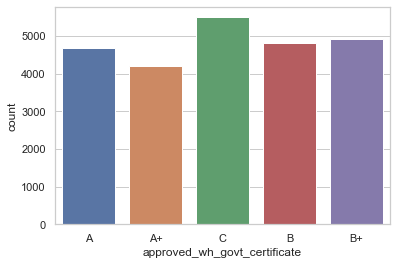

In [278]:
sns.countplot(df['approved_wh_govt_certificate'])

* As all the grades are almost similar so filling null values with ffill

In [279]:
df['approved_wh_govt_certificate']=df['approved_wh_govt_certificate'].fillna(method='ffill')

### Univariate Analysis

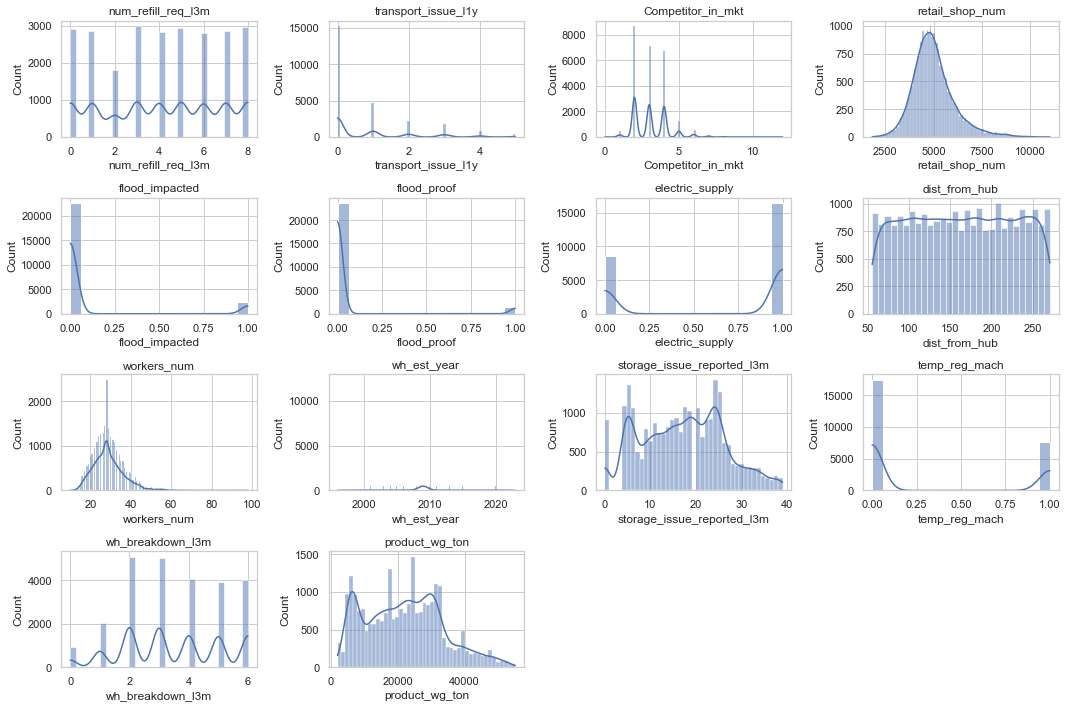

In [280]:
# Plot histograms for numerical features
numerical_columns = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 
                     'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num','wh_est_year',
                      'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'product_wg_ton']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

* num_refill_req_l3m:slightllyeft-skewed distribution . Most warehouses have a moderate level of refill requests, but a few experience significantly higher numbers.
* transport_issue_l1y: Right-skewed distribution. Most warehouses have a low number of transport issues, but a few have a higher frequency.
* Competitor_in_mkt:Majority of warehouses face competition from 2 to 3 competitors. Fewer warehouses experience higher levels of competition.
* Retail_shop_num:Somewhat right-skewed distribution. Most warehouses have a moderate number of retail shops, but some have a higher count.
* dist_from_hub:Distribution of distances from the warehouse to the production hub is spread out. 
* workers_num: Moderately right skewed  with Peak around 28 workers, suggesting many warehouses have a similar number of workers.
* product_wg_ton: Slightly right skewed distribution. Warehouses produce noodles with a variety of product weights.


<AxesSubplot:xlabel='product_wg_ton'>

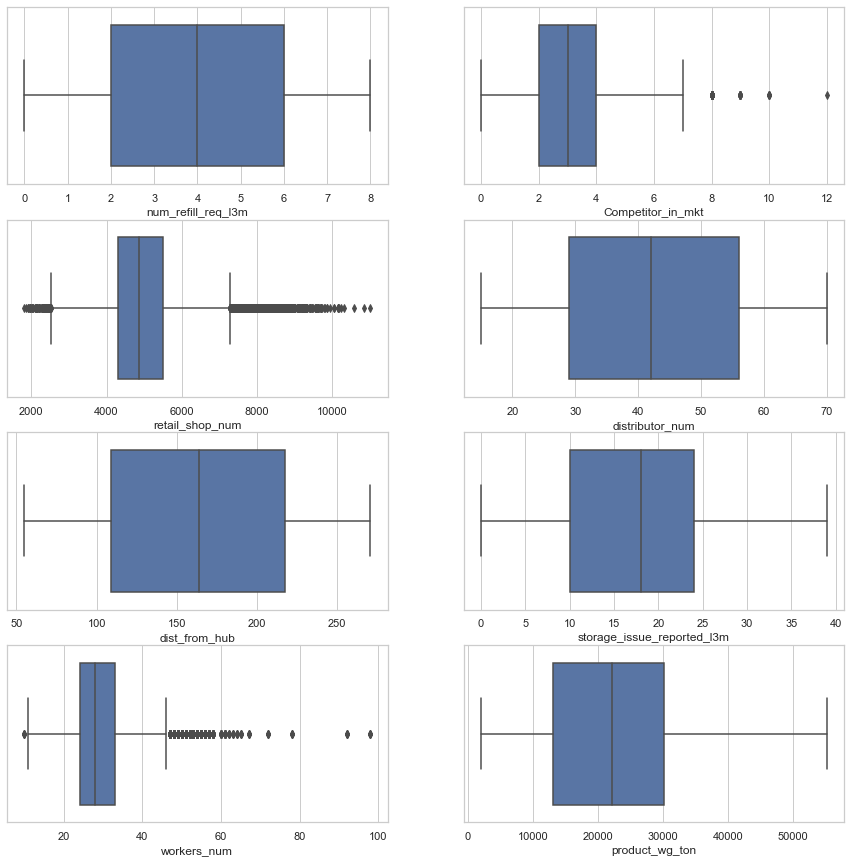

In [286]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,15)
sns.boxplot(x='num_refill_req_l3m', data=df, ax=axes[0][0])
sns.boxplot(x='Competitor_in_mkt', data=df, ax=axes[0][1])
sns.boxplot(x='retail_shop_num', data=df, ax=axes[1][0])
sns.boxplot(x='distributor_num', data=df, ax=axes[1][1])
sns.boxplot(x='dist_from_hub', data=df, ax=axes[2][0])
sns.boxplot(x='storage_issue_reported_l3m', data=df, ax=axes[2][1])
sns.boxplot(x='workers_num', data=df, ax=axes[3][0])
sns.boxplot(x='product_wg_ton', data=df, ax=axes[3][1]) 

                      

### There are Outliers present but not removing those because it may cause loss of data

## Bivariate Analysis

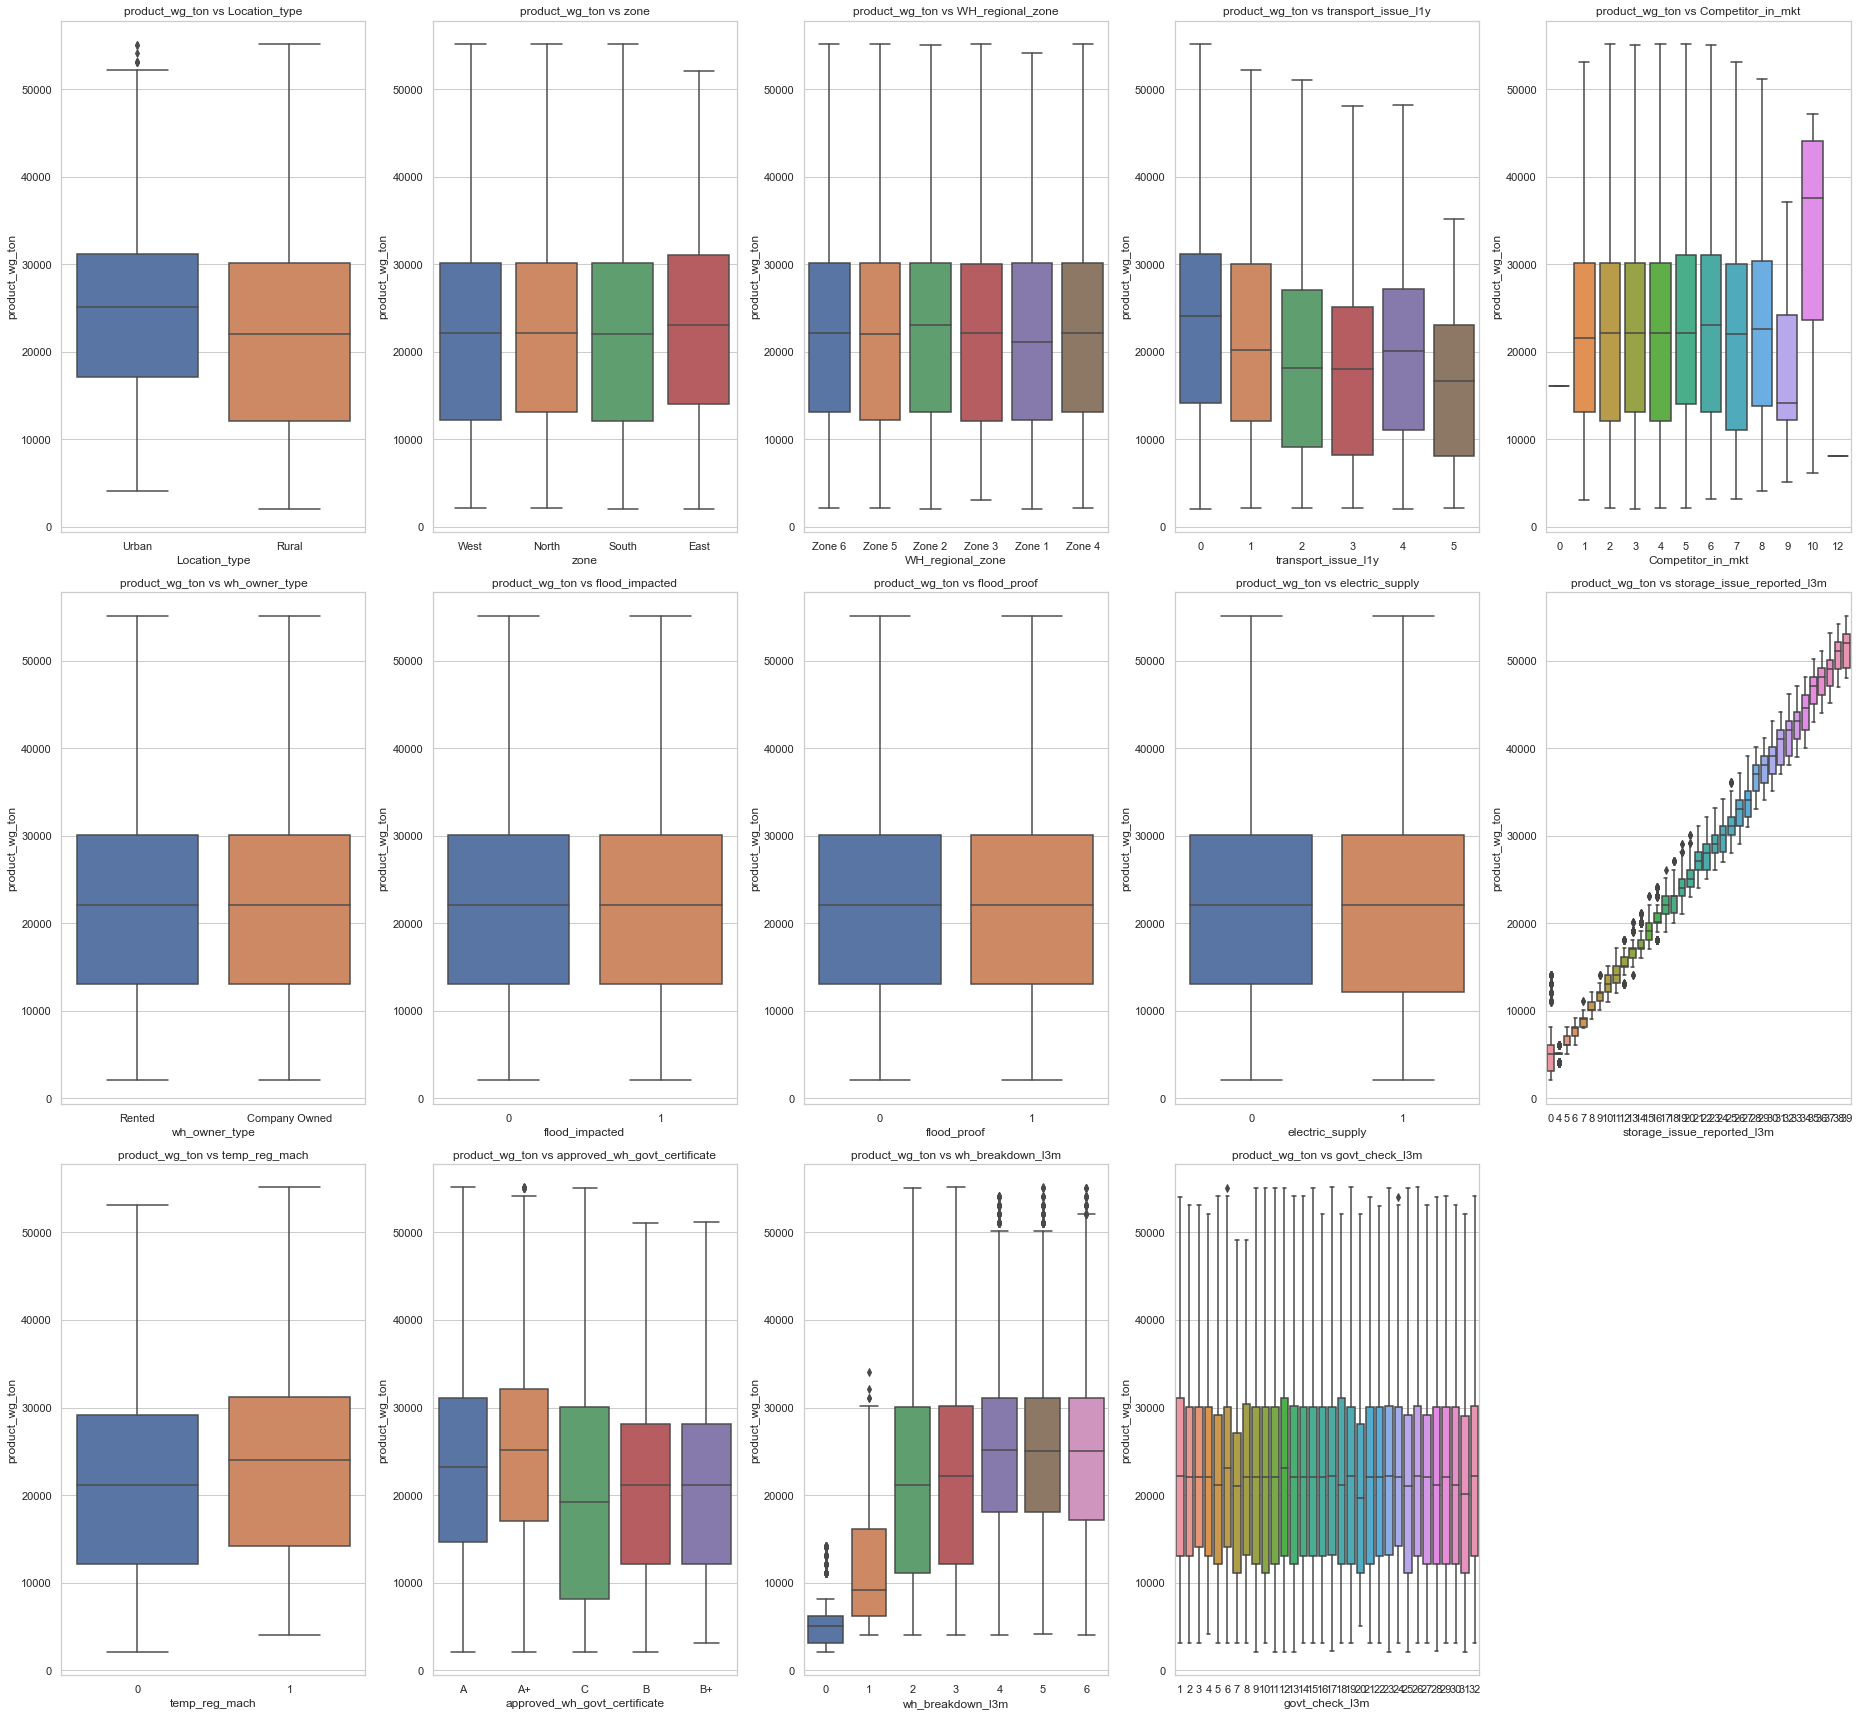

In [287]:
categorical_features = ['Location_type', 'zone', 'WH_regional_zone', 'transport_issue_l1y',
                        'Competitor_in_mkt', 'wh_owner_type', 'flood_impacted', 'flood_proof',
                        'electric_supply', 'storage_issue_reported_l3m', 'temp_reg_mach',
                        'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m']

numerical_feature = 'product_wg_ton'

# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a box plot for each categorical feature and the numerical feature
plt.figure(figsize=(26, 24))
for i, cat_feature in enumerate(categorical_features, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=cat_feature, y=numerical_feature, data=df)
    plt.title(f'{numerical_feature} vs {cat_feature}')

plt.tight_layout()
plt.show()

#### Rural Influence on Product Weight:
* The data suggests that product weight tends to be higher in rural areas.

#### Zone-wise Disparities:
* Analysis by zone indicates a predominant contribution from the west and south zones in terms of product weight. Interestingly, zones 6, 5,2 and 4 exhibit substantial contributions as well.

#### Competitor Dynamics:
* There is a positive correlation between higher product_wg_ton and an increased presence of competitors in the market.

#### Warehouse Ownership Impact:
* Warehouses owned by the company or rented appear to be similar in terms of product weight.

#### Flood Resilience:
* Factors such as flood-proof infrastructure and flood impact exhibit relatively lower significance concerning product_wg_ton.

#### Storage Challenges:
* A notable finding is that as product_wg_ton increases storage issues also increases

#### Correlation with Other Variables:
* Categorical variables like approved_wh_govt_certificate and wh_breakdown_l3m demonstrate a positive correlation with product_wg_ton.



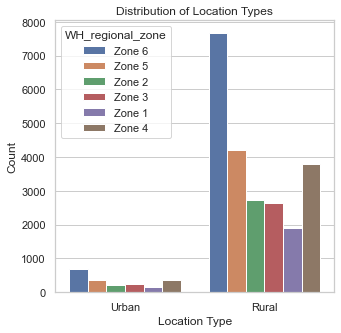

In [288]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Location_type',hue='WH_regional_zone')
plt.title('Distribution of Location Types')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

* More no of zones are present in rural areas

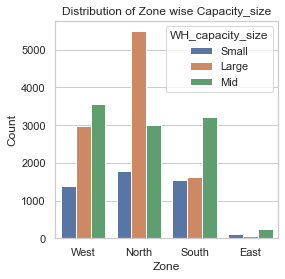

In [289]:
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='zone',hue='WH_capacity_size')
plt.title('Distribution of Zone wise Capacity_size')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.show()

* Large capacity warehouses are present in north followed by the West and South.

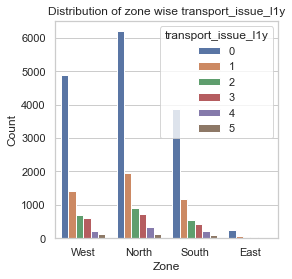

In [290]:
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='zone',hue='transport_issue_l1y')
plt.title('Distribution of zone wise transport_issue_l1y')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.show()

* Notably, transport issues peak in  North zones

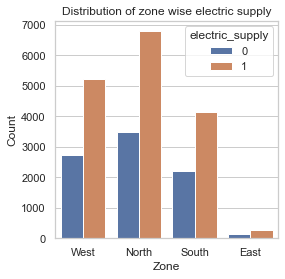

In [291]:
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='zone',hue='electric_supply')
plt.title('Distribution of zone wise electric supply')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.show()

* Electric supply problems are most prevalent in the North, underscoring a critical infrastructure concern

### Drop unnecessary columns

In [292]:
df.drop(['Ware_house_ID','WH_Manager_ID'],axis=1,inplace=True)


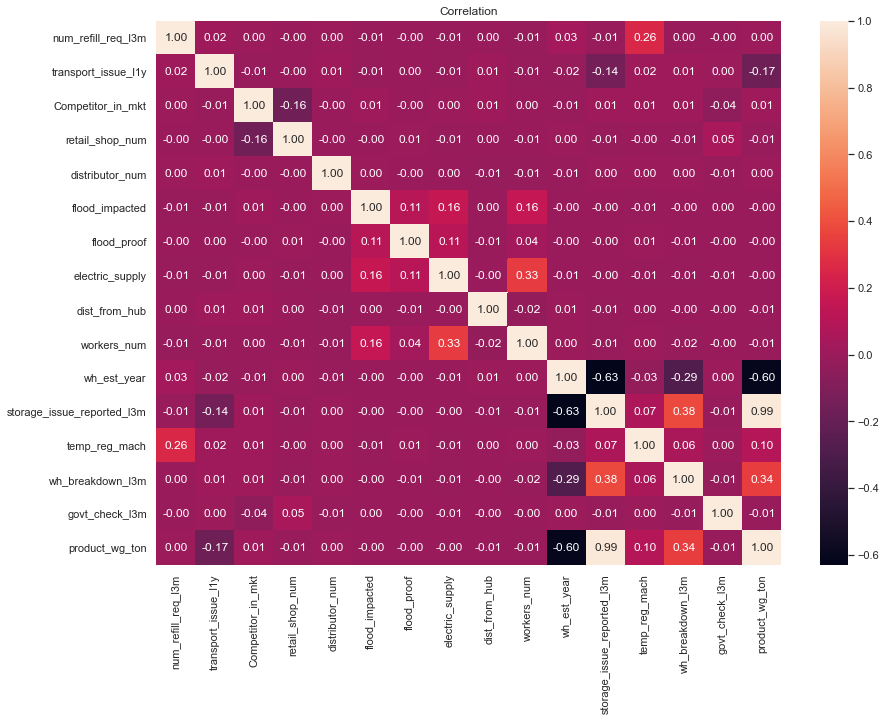

In [293]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(),annot=True,cbar =True,fmt='.2f')
plt.title('Correlation')
plt.show()

* There is a robust positive correlation (coefficient = 0.99) between the number of storage issues reported in the last 3 months and the weight of products shipped. This suggests a significant relationship, implying that as the instances of storage issues increase, the weight of products shipped from the warehouse tends to rise correspondingly.

* The positive correlation coefficient of 0.34 between warehouse breakdowns and product weight, while moderate, can still be considered useful in model development. It suggests that there is a noticeable relationship not as strong as the storage issues, between warehouse breakdowns and the weight of shipped products.

* A noteworthy negative correlation (coefficient = -0.61) exists between the establishment year of the warehouse and product weight. This implies that newer warehouses tend to exhibit a higher volume of product shipments compared to older ones. The negative correlation suggests that as the establishment year of the warehouse decreases (indicating a more recently established warehouse), the weight of products shipped tends to increase.

* Another positive correlation observed is that between number of workers VS electric supply and storage issues reported vs ware house break down.

* However another intereresting point is that the manpower (workers_num) does not hold any positive correlation between any of the numerical variables.

### Encoding Categorical Variables

In [294]:
label_encoder = LabelEncoder()
categorical_cols = ['Location_type','zone','WH_regional_zone', 'WH_capacity_size',
        'wh_owner_type',
       'approved_wh_govt_certificate']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
df.head()


,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,2,3,5,3,1,2,4651,1,24,...,1,91,29.0,2009.0,13,0,0,5,15,17115
1,0,0,1,4,0,0,4,6217,0,47,...,1,210,31.0,2009.0,4,0,0,3,17,5074
2,0,1,2,1,1,0,4,4306,0,64,...,0,161,37.0,2009.0,17,0,0,6,22,23137
3,0,1,1,2,7,4,2,6000,1,50,...,0,103,21.0,2009.0,17,1,1,3,27,22115
4,0,0,1,4,3,1,2,4740,0,42,...,1,112,25.0,2009.0,18,0,4,6,24,24071


In [295]:
X=df.drop(['product_wg_ton'],axis=1)
Y=df[['product_wg_ton']]


### Train Test Split

In [296]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

### Linear Regression

Mean Absolute Error (LMAE): 1259.6819023899518
Mean Squared Error (LMSE): 2856012.07174669
Root Mean Squared Error (LRMSE): 1689.97398552365
R-squared (R2): 0.9788728863601069


Text(0, 0.5, 'Predicted Values')

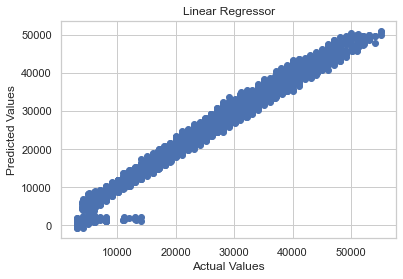

In [297]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(x_train, y_train)
y_pred = linear_regression_model.predict(x_test)
Lmae = mean_absolute_error(y_test, y_pred)
Lmse = mean_squared_error(y_test, y_pred)
Lrmse = np.sqrt(Lmse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (LMAE):", Lmae)
print("Mean Squared Error (LMSE):", Lmse)
print("Root Mean Squared Error (LRMSE):",Lrmse)
print("R-squared (R2):", r2)
# Plot for Linear Regressor
plt.scatter(y_test, y_pred)
plt.title("Linear Regressor")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

### Decision Tree Regressor

Desition tree regression metrics:
Mean Absolute Error: 810.307
Mean Squared Error: 1462974.907
Root Mean Squared Error: 1209.5349961865509
R^2 score: 0.989177763841314


Text(0, 0.5, 'Predicted Values')

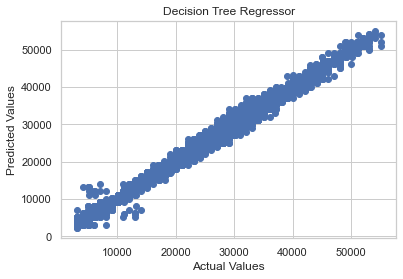

In [298]:
DT_Reg=DecisionTreeRegressor(random_state=42)
DT_Reg.fit(x_train, y_train)
y_pred_dt=DT_Reg.predict(x_test)
mae_dt=mean_absolute_error(y_test, y_pred_dt)
mse_dt=mean_squared_error(y_test, y_pred_dt)
rmse_dt=np.sqrt(mse_dt)
r2_dt=r2_score(y_test, y_pred_dt)
print("Desition tree regression metrics:")
print("Mean Absolute Error:",mae_dt)
print("Mean Squared Error:",mse_dt)
print("Root Mean Squared Error:",rmse_dt)
print("R^2 score:",r2_dt)
# Plot for Decision Tree Regressor
plt.scatter(y_test, y_pred_dt)
plt.title("Decision Tree Regressor")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

### Random Forest Regressor

Random forest regression metrics:
Mean Absolute Error: 673.8112200000002
Mean Squared Error: 809909.24177932
Root Mean Squared Error: 899.9495773538204
R^2 score: 0.9940087632127527


Text(0, 0.5, 'Predicted Values')

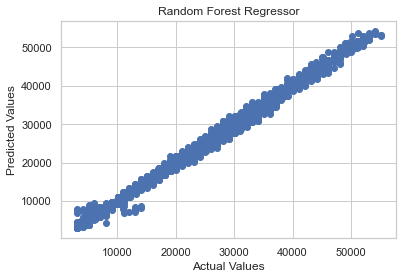

In [299]:
RF_Reg=RandomForestRegressor( random_state=42)
RF_Reg.fit(x_train, y_train)
y_pred_rf=RF_Reg.predict(x_test)
mae_rf=mean_absolute_error(y_test, y_pred_rf)
mse_rf=mean_squared_error(y_test, y_pred_rf)
rmse_rf=np.sqrt(mse_rf)
r2_rf=r2_score(y_test, y_pred_rf)
print("Random forest regression metrics:")
print("Mean Absolute Error:",mae_rf)
print("Mean Squared Error:",mse_rf)
print("Root Mean Squared Error:",rmse_rf)
print("R^2 score:",r2_rf)
# Plot for Random Forest Regressor
plt.scatter(y_test, y_pred_rf)
plt.title("Random Forest Regressor")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

### Adaboost Regressor

AdaBoost Regression Metrics:
Mean Absolute Error (MAE): 1364.881233322358
Mean Squared Error (MSE): 2870914.345309465
Root Mean Squared Error (RMSE): 1694.377273605104
R-squared (R2): 0.9787626480210718


Text(0, 0.5, 'Predicted Values')

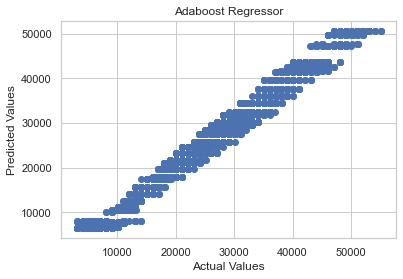

In [300]:
ada_boost_regressor=AdaBoostRegressor(random_state=42)
ada_boost_regressor.fit(x_train, y_train)
y_pred_ada_boost=ada_boost_regressor.predict(x_test)
mae_ada_boost=mean_absolute_error(y_test, y_pred_ada_boost)
mse_ada_boost=mean_squared_error(y_test, y_pred_ada_boost)
rmse_ada_boost=np.sqrt(mse_ada_boost)
r2_ada_boost=r2_score(y_test, y_pred_ada_boost)
print("AdaBoost Regression Metrics:")
print("Mean Absolute Error (MAE):", mae_ada_boost)
print("Mean Squared Error (MSE):", mse_ada_boost)
print("Root Mean Squared Error (RMSE):", rmse_ada_boost)
print("R-squared (R2):", r2_ada_boost)
# Plot for Adaboost Regressor
plt.scatter(y_test, y_pred_ada_boost)
plt.title("Adaboost Regressor")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

### Gradient Boosting Regressor

Training R-squared (R2): 0.9951523146843042
Gradient Boosting Regression Metrics:
Mean Absolute Error (MAE): 649.4254822861678
Mean Squared Error (MSE): 747379.8507312235
Root Mean Squared Error (RMSE): 864.5113363809774
R-squared (R2): 0.9944713192234835


Text(0, 0.5, 'Predicted Values')

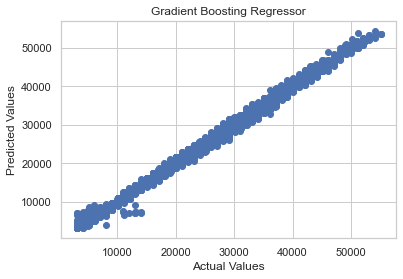

In [301]:
gradient_boosting_regressor=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gradient_boosting_regressor.fit(x_train, y_train)
y_pred_gradient_boosting=gradient_boosting_regressor.predict(x_test)
mae_gradient_boosting=mean_absolute_error(y_test, y_pred_gradient_boosting)
mse_gradient_boosting=mean_squared_error(y_test, y_pred_gradient_boosting)
rmse_gradient_boosting=np.sqrt(mse_gradient_boosting)
r2_gradient_boosting=r2_score(y_test, y_pred_gradient_boosting)
y_train_pred=gradient_boosting_regressor.predict(x_train)
r2_gb_train=r2_score(y_train,y_train_pred)
print("Training R-squared (R2):", r2_gb_train)
print("Gradient Boosting Regression Metrics:")
print("Mean Absolute Error (MAE):", mae_gradient_boosting)
print("Mean Squared Error (MSE):", mse_gradient_boosting)
print("Root Mean Squared Error (RMSE):", rmse_gradient_boosting)
print("R-squared (R2):", r2_gradient_boosting)
# Plot for Gradient Boosting Regressor
plt.scatter(y_test, y_pred_gradient_boosting)
plt.title("Gradient Boosting Regressor")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

### XGBRegressor

Training R-squared (R2): 0.9971373592993812
XGB Regression Metrics:
Mean Absolute Error (MAE): 659.1137929199218
Mean Squared Error (MSE): 777182.9604852246
Root Mean Squared Error (RMSE): 881.579809481379
R-squared (R2): 0.9942508531782508


Text(0, 0.5, 'Predicted Values')

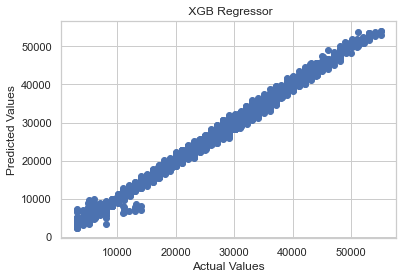

In [302]:
xgb_regressor=XGBRegressor(random_state=42)
xgb_regressor.fit(x_train, y_train)
y_pred_xgb=xgb_regressor.predict(x_test)
mae_xgb=mean_absolute_error(y_test, y_pred_xgb)
mse_xgb=mean_squared_error(y_test, y_pred_xgb)
rmse_xgb=np.sqrt(mse_xgb)
r2_xgb=r2_score(y_test, y_pred_xgb)
y_train_pred=xgb_regressor.predict(x_train)
r2_xgb_train=r2_score(y_train,y_train_pred)
print("Training R-squared (R2):", r2_xgb_train)
print("XGB Regression Metrics:")
print("Mean Absolute Error (MAE):", mae_xgb)
print("Mean Squared Error (MSE):", mse_xgb)
print("Root Mean Squared Error (RMSE):", rmse_xgb)
print("R-squared (R2):", r2_xgb)
# Plot for XGB Regressor
plt.scatter(y_test, y_pred_xgb)
plt.title(" XGB Regressor")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

In [303]:
accuracy_data = [['Linear Regression',Lmae,Lmse,Lrmse,r2 ],
        ['Decision Tree',mae_dt,mse_dt,rmse_dt,r2_dt],
        ['Random Forest', mae_rf,mse_rf,rmse_rf,r2_rf],
        ['AdaBoost Regression',mae_ada_boost,mse_ada_boost,rmse_ada_boost,r2_ada_boost],
        ['Gradient Boosting Regression',mae_gradient_boosting,mse_gradient_boosting,rmse_gradient_boosting, r2_gradient_boosting],
              ['XGB Regression',mae_xgb,mse_xgb,rmse_xgb,r2_xgb]]
        
accuracy_df= pd.DataFrame(accuracy_data, columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2 SCORE'])
accuracy_df[['MSE','RMSE','MAE']] =accuracy_df[['MSE','RMSE','MAE']].apply(np.int64)

accuracy_df

,Model,MSE,RMSE,MAE,R2 SCORE
0,Linear Regression,1259,2856012,1689,0.978873
1,Decision Tree,810,1462974,1209,0.989178
2,Random Forest,673,809909,899,0.994009
3,AdaBoost Regression,1364,2870914,1694,0.978763
4,Gradient Boosting Regression,649,747379,864,0.994471
5,XGB Regression,659,777182,881,0.994251


### CONCLUSION

#### Model Performance Evaluation:

* The Gradient Boosting Regressor outperformed other models by achieving highest R2 value and lowest MSE,RMSE and MAE

#### Variation in Demand and Supply:
* Analysis of the data revealed significant variations in both demand and supply across different regions and warehouses.

#### Importance of Machine Learning Models:
* Machine learning models provided valuable predictions for optimizing supply quantities, as indicated by the Mean Squared Error (MSE) metric, which measures the level of error in predictions. Recommendations:

#### Model Integration:
* Suggests implementing the best-performing machine learning model (Gradient Boosting) into the supply chain management system for optimizing supply quantities based on historical data and predictive analytics. Demand Forecasting: Encourages improving demand forecasting capabilities to align supply more effectively with market demand, thereby reducing the risk of overstock or understock situations. Competitive Analysis: Advises continuous monitoring and analysis of the competitive landscape to adapt supply chain strategies accordingly.

#### Overall Project Significance:
* The project demonstrates the impactful role of data science and machine learning in addressing real-world challenges in supply chain optimization.

#### Business Benefits:
* Implementing data-driven solutions and leveraging historical data can significantly improve supply chain efficiency, reduce costs, and enhance competitiveness in the instant noodles market.

* By addressing these points, the conclusion provides a comprehensive overview of the project's findings, highlights the strengths and weaknesses of various models, and offers practical recommendations for improving supply chain management in the context of the FMCG company.